In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import atan2, degrees
%matplotlib inline

In [3]:
datacsi = pd.read_excel("csidata.xlsx", sheet_name="csibruto")
csisubcarrier = pd.read_excel("csidata.xlsx", sheet_name="csi_subportadoras")

In [54]:
datacsi.head()

,device,local,real0,im0,real1,im1,real2,im2,real3,im3,...,real123,im123,real124,im124,real125,im125,real126,im126,real127,im127
0,DIR,A1,102,-32,5,0,25,0,24,0,...,48,7,49,6,50,5,50,4,50,3
1,DIR,A1,126,97,23,0,-25,-5,-24,-4,...,-47,-14,-49,-13,-51,-12,-51,-10,-51,-9
2,DIR,A1,126,97,23,0,-5,25,-5,24,...,-17,46,-15,47,-14,49,-13,50,-11,51
3,DIR,A1,126,97,23,0,16,-19,15,-18,...,36,-34,36,-36,36,-37,35,-39,34,-39
4,DIR,A1,126,97,23,0,10,19,10,18,...,15,40,16,40,18,41,19,41,20,40


In [ ]:
datacsi.dtypes

In [56]:
csisubcarrier

,device,local,Amp_sub0,Fase_sub0,Amp_sub1,Fase_sub1,Amp_sub2,Fase_sub2,Amp_sub3,Fase_sub3,...,Amp_sub123,Fase_sub123,Amp_sub124,Fase_sub124,Amp_sub125,Fase_sub125,Amp_sub126,Fase_sub126,Amp_sub127,Fase_sub127
0,DIR,A1,106.901824,-17.417971,5.0,0.0,25.000000,0.000000,24.000000,0.000000,...,48.507731,8.297145,49.365980,6.981057,50.249378,5.710593,50.159745,4.573921,50.089919,3.433630
1,DIR,A1,159.012578,37.590561,23.0,0.0,25.495098,-168.690068,24.331050,-170.537678,...,49.040799,-163.412661,50.695167,-165.141386,52.392748,-166.759480,51.971146,-168.906277,51.788030,-169.992020
2,DIR,A1,159.012578,37.590561,23.0,0.0,25.495098,101.309932,24.515301,101.768289,...,49.040799,110.282559,49.335586,107.700428,50.960769,105.945396,51.662365,104.574216,52.172790,102.171458
3,DIR,A1,159.012578,37.590561,23.0,0.0,24.839485,-49.899092,23.430749,-50.194429,...,49.517674,-43.363423,50.911688,-45.000000,51.623638,-45.784825,52.402290,-48.094058,51.739733,-48.918249
4,DIR,A1,159.012578,37.590561,23.0,0.0,21.470911,62.241459,20.591260,60.945396,...,42.720019,69.443955,43.081318,68.198591,44.777226,66.297354,45.188494,65.136303,44.721360,63.434949
5,DIR,A1,159.012578,37.590561,23.0,0.0,27.658633,-130.601295,26.907248,-131.987212,...,53.009433,-125.788973,54.817880,-128.333340,56.080300,-129.936383,56.727418,-130.710847,56.639209,-132.137595
6,DIR,A1,159.012578,37.590561,23.0,0.0,25.000000,-163.739795,24.041631,-163.072487,...,47.169906,-158.875281,48.703183,-160.820992,49.648766,-161.200115,49.335586,-162.299572,49.040799,-163.412661
7,DIR,A1,159.012578,37.590561,23.0,0.0,23.537205,-167.735226,22.360680,-169.695154,...,47.434165,-161.565051,47.801674,-164.219247,48.507731,-165.677280,48.270074,-166.827447,48.052055,-167.988522
8,DIR,A1,159.012578,37.590561,23.0,0.0,24.413111,-55.007980,23.853721,-56.976132,...,48.104054,-46.684684,48.918299,-49.144624,49.040799,-50.792796,50.606324,-52.224316,50.219518,-54.727579
9,DIR,A1,159.012578,37.590561,23.0,0.0,25.942244,-117.552812,25.059928,-118.610460,...,49.193496,-116.565051,51.000000,-118.072487,50.606324,-119.604451,51.107729,-120.579227,50.774009,-122.124998


In [7]:
csisubcarrier.columns

Index(['device', 'local', 'Amp_sub0', 'Fase_sub0', 'Amp_sub1', 'Fase_sub1',
       'Amp_sub2', 'Fase_sub2', 'Amp_sub3', 'Fase_sub3',
       ...
       'Amp_sub123', 'Fase_sub123', 'Amp_sub124', 'Fase_sub124', 'Amp_sub125',
       'Fase_sub125', 'Amp_sub126', 'Fase_sub126', 'Amp_sub127',
       'Fase_sub127'],
      dtype='object', length=258)

In [57]:
csisubcarrier["device"] = datacsi["device"]
csisubcarrier["local"] = datacsi["local"]
csisubcarrier.head()

,device,local,Amp_sub0,Fase_sub0,Amp_sub1,Fase_sub1,Amp_sub2,Fase_sub2,Amp_sub3,Fase_sub3,...,Amp_sub123,Fase_sub123,Amp_sub124,Fase_sub124,Amp_sub125,Fase_sub125,Amp_sub126,Fase_sub126,Amp_sub127,Fase_sub127
0,DIR,A1,106.901824,-17.417971,5.0,0.0,25.000000,0.000000,24.000000,0.000000,...,48.507731,8.297145,49.365980,6.981057,50.249378,5.710593,50.159745,4.573921,50.089919,3.433630
1,DIR,A1,159.012578,37.590561,23.0,0.0,25.495098,-168.690068,24.331050,-170.537678,...,49.040799,-163.412661,50.695167,-165.141386,52.392748,-166.759480,51.971146,-168.906277,51.788030,-169.992020
2,DIR,A1,159.012578,37.590561,23.0,0.0,25.495098,101.309932,24.515301,101.768289,...,49.040799,110.282559,49.335586,107.700428,50.960769,105.945396,51.662365,104.574216,52.172790,102.171458
3,DIR,A1,159.012578,37.590561,23.0,0.0,24.839485,-49.899092,23.430749,-50.194429,...,49.517674,-43.363423,50.911688,-45.000000,51.623638,-45.784825,52.402290,-48.094058,51.739733,-48.918249
4,DIR,A1,159.012578,37.590561,23.0,0.0,21.470911,62.241459,20.591260,60.945396,...,42.720019,69.443955,43.081318,68.198591,44.777226,66.297354,45.188494,65.136303,44.721360,63.434949


In [9]:
x=0
y=2
while(x<len(datacsi)):
    y=2
    while(y<len(datacsi.columns)):
        csisubcarrier[csisubcarrier.columns[y]][x] = (datacsi[datacsi.columns[y]][x]**2+datacsi[datacsi.columns[y+1]][x]**2)**(1/2)
        csisubcarrier[csisubcarrier.columns[y+1]][x] = degrees(atan2(datacsi[datacsi.columns[y+1]][x],datacsi[datacsi.columns[y]][x]))
        y=y+2
    x=x+1

In [11]:
# IMPORTANTE PARA CONSEGUIR PLOTAR POIS AO GERAR UM NOVO DF ELE FICA COMO OBJETOS!!!!!! PRECISA CONVERTER PARA O TIPO FLOAT!!!
csisubcarrier[csisubcarrier.columns[0:2:1]] = csisubcarrier[csisubcarrier.columns[0:2:1]].astype(str)
csisubcarrier[csisubcarrier.columns[2:len(csisubcarrier.columns):1]] = csisubcarrier[csisubcarrier.columns[2:len(csisubcarrier.columns):1]].astype(float)

In [12]:
csisubcarrier.head()

,device,local,Amp_sub0,Fase_sub0,Amp_sub1,Fase_sub1,Amp_sub2,Fase_sub2,Amp_sub3,Fase_sub3,...,Amp_sub123,Fase_sub123,Amp_sub124,Fase_sub124,Amp_sub125,Fase_sub125,Amp_sub126,Fase_sub126,Amp_sub127,Fase_sub127
0,DIR,A1,106.901824,-17.417971,5.0,0.0,25.000000,0.000000,24.000000,0.000000,...,48.507731,8.297145,49.365980,6.981057,50.249378,5.710593,50.159745,4.573921,50.089919,3.433630
1,DIR,A1,159.012578,37.590561,23.0,0.0,25.495098,-168.690068,24.331050,-170.537678,...,49.040799,-163.412661,50.695167,-165.141386,52.392748,-166.759480,51.971146,-168.906277,51.788030,-169.992020
2,DIR,A1,159.012578,37.590561,23.0,0.0,25.495098,101.309932,24.515301,101.768289,...,49.040799,110.282559,49.335586,107.700428,50.960769,105.945396,51.662365,104.574216,52.172790,102.171458
3,DIR,A1,159.012578,37.590561,23.0,0.0,24.839485,-49.899092,23.430749,-50.194429,...,49.517674,-43.363423,50.911688,-45.000000,51.623638,-45.784825,52.402290,-48.094058,51.739733,-48.918249
4,DIR,A1,159.012578,37.590561,23.0,0.0,21.470911,62.241459,20.591260,60.945396,...,42.720019,69.443955,43.081318,68.198591,44.777226,66.297354,45.188494,65.136303,44.721360,63.434949


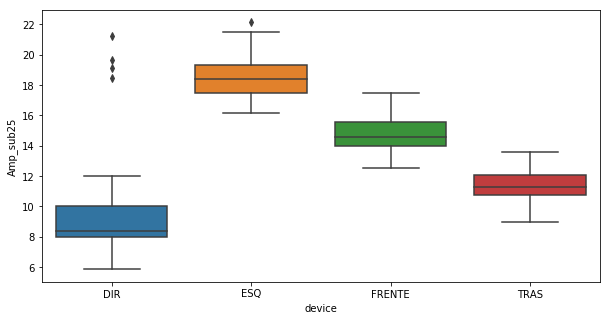

In [58]:
teste = csisubcarrier[csisubcarrier["local"]=="A3"]
# teste.head()
#teste.plot(use_index=True,y="Amp_sub15")
#teste.reset_index().head()
plt.figure(figsize=(10,5))
#fig = sns.boxplot(data=teste,orient="v")
sns.boxplot(x="device",y='Amp_sub25',data=teste)


Text(0.5, 1.0, 'Variação da amplitude de uma Subportadora em um unico dispositivo em diversos pontos')

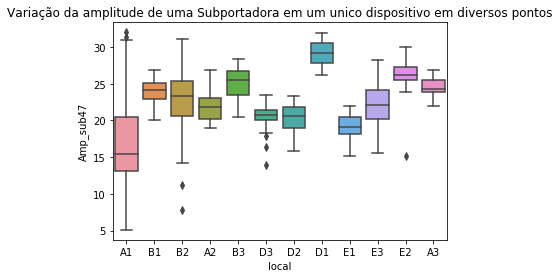

In [18]:
# teste = csisubcarrier[(csisubcarrier["device"]=="FRENTE") & (csisubcarrier["local"]=="A1")][csisubcarrier.columns[6:32:2]]
teste = csisubcarrier[csisubcarrier["device"]=="FRENTE"]
g= sns.boxplot(x="local",y='Amp_sub47',data=teste)
plt.title("Variação da amplitude de uma Subportadora em um unico dispositivo em diversos pontos")

Text(0.5, 1.0, 'Variação da amplitude de uma Subportadora em vários direções em diversos pontos')

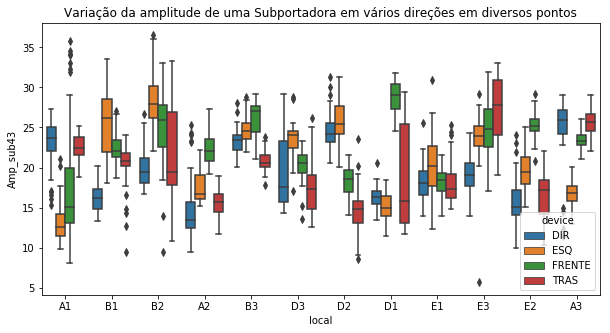

In [59]:
plt.figure(figsize=(10,5))
f = sns.boxplot(x="local",y='Amp_sub43',data=csisubcarrier,hue="device")
plt.title("Variação da amplitude de uma Subportadora em vários direções em diversos pontos")

In [36]:
csisubcarrier[csisubcarrier.columns[6:129:2]].head()

,Amp_sub2,Amp_sub3,Amp_sub4,Amp_sub5,Amp_sub6,Amp_sub7,Amp_sub8,Amp_sub9,Amp_sub10,Amp_sub11,...,Amp_sub54,Amp_sub55,Amp_sub56,Amp_sub57,Amp_sub58,Amp_sub59,Amp_sub60,Amp_sub61,Amp_sub62,Amp_sub63
0,25.000000,24.000000,22.000000,21.023796,20.099751,19.235384,17.464249,16.763055,16.155494,15.231546,...,21.540659,22.135944,22.803509,23.345235,24.186773,24.083189,25.079872,26.019224,26.019224,27.018512
1,25.495098,24.331050,24.331050,22.203603,21.095023,20.024984,19.000000,18.027756,17.117243,17.262677,...,22.472205,22.825424,24.166092,24.698178,25.298221,25.298221,25.961510,26.683328,27.658633,27.658633
2,25.495098,24.515301,23.345235,21.213203,20.099751,19.026298,18.000000,17.029386,16.124515,15.524175,...,22.472205,23.323808,23.706539,24.166092,24.698178,25.298221,26.248809,25.961510,26.925824,26.683328
3,24.839485,23.430749,22.803509,21.400935,20.248457,19.723083,17.888544,17.464249,16.155494,15.811388,...,22.472205,23.021729,22.803509,24.083189,24.758837,25.455844,26.172505,26.172505,27.658633,28.425341
4,21.470911,20.591260,19.235384,18.357560,16.643317,16.401219,14.866069,14.142136,13.453624,12.806248,...,19.026298,20.099751,20.396078,20.615528,20.880613,22.135944,22.472205,22.472205,23.769729,22.847319


Text(0, 0.5, 'Amplitude das Subportadoras')

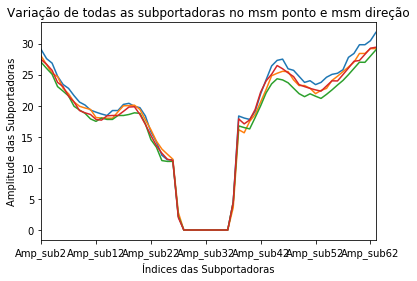

In [61]:
csisubcarrier[csisubcarrier.columns[6:129:2]].loc[1890].plot()
csisubcarrier[csisubcarrier.columns[6:129:2]].loc[1891].plot()
csisubcarrier[csisubcarrier.columns[6:129:2]].loc[1892].plot()
csisubcarrier[csisubcarrier.columns[6:129:2]].loc[1893].plot()
plt.title("Variação de todas as subportadoras no msm ponto e msm direção")
plt.xlabel("Índices das Subportadoras")
plt.ylabel("Amplitude das Subportadoras")

Text(0, 0.5, 'Amplitude das Subportadoras')

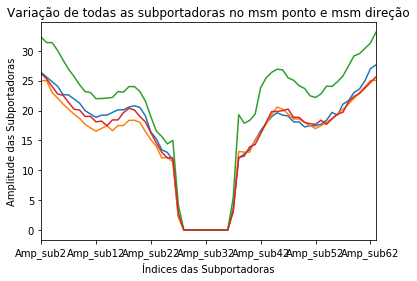

In [64]:
csisubcarrier[csisubcarrier.columns[6:129:2]].loc[320].plot()
csisubcarrier[csisubcarrier.columns[6:129:2]].loc[321].plot()
csisubcarrier[csisubcarrier.columns[6:129:2]].loc[322].plot()
csisubcarrier[csisubcarrier.columns[6:129:2]].loc[323].plot()
plt.title("Variação de todas as subportadoras no msm ponto e msm direção")
plt.xlabel("Índices das Subportadoras")
plt.ylabel("Amplitude das Subportadoras")

In [138]:
csisubcarrier.columns[2:129:2]

Index(['Amp_sub0', 'Amp_sub1', 'Amp_sub2', 'Amp_sub3', 'Amp_sub4', 'Amp_sub5',
       'Amp_sub6', 'Amp_sub7', 'Amp_sub8', 'Amp_sub9', 'Amp_sub10',
       'Amp_sub11', 'Amp_sub12', 'Amp_sub13', 'Amp_sub14', 'Amp_sub15',
       'Amp_sub16', 'Amp_sub17', 'Amp_sub18', 'Amp_sub19', 'Amp_sub20',
       'Amp_sub21', 'Amp_sub22', 'Amp_sub23', 'Amp_sub24', 'Amp_sub25',
       'Amp_sub26', 'Amp_sub27', 'Amp_sub28', 'Amp_sub29', 'Amp_sub30',
       'Amp_sub31', 'Amp_sub32', 'Amp_sub33', 'Amp_sub34', 'Amp_sub35',
       'Amp_sub36', 'Amp_sub37', 'Amp_sub38', 'Amp_sub39', 'Amp_sub40',
       'Amp_sub41', 'Amp_sub42', 'Amp_sub43', 'Amp_sub44', 'Amp_sub45',
       'Amp_sub46', 'Amp_sub47', 'Amp_sub48', 'Amp_sub49', 'Amp_sub50',
       'Amp_sub51', 'Amp_sub52', 'Amp_sub53', 'Amp_sub54', 'Amp_sub55',
       'Amp_sub56', 'Amp_sub57', 'Amp_sub58', 'Amp_sub59', 'Amp_sub60',
       'Amp_sub61', 'Amp_sub62', 'Amp_sub63'],
      dtype='object')

In [148]:
colunas = np.arange(2, 129, 2)
str = csisubcarrier.columns[colunas[0]]
print(str)

Amp_sub0


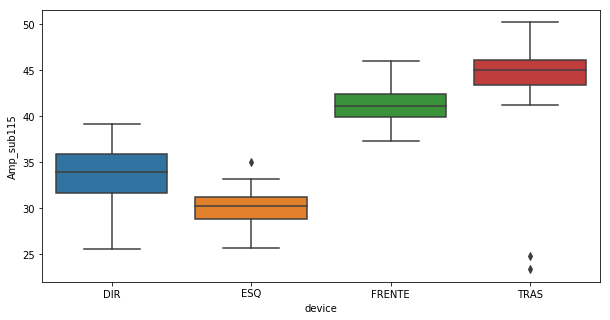

In [65]:
teste = csisubcarrier[csisubcarrier["local"]=="A3"]
# teste.head()
#teste.plot(use_index=True,y="Amp_sub15")
#teste.reset_index().head()
plt.figure(figsize=(10,5))
#fig = sns.boxplot(data=teste,orient="v")
sns.boxplot(x="device",y='Amp_sub115',data=teste)


Text(0, 0.5, 'Amplitude das Subportadoras')

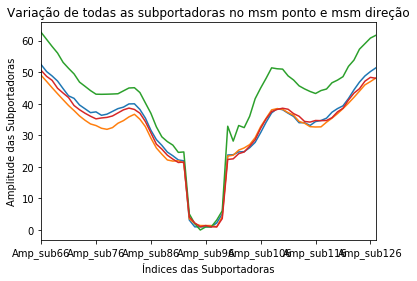

In [71]:
csisubcarrier[csisubcarrier.columns[134:len(csisubcarrier.columns):2]].loc[320].plot()
csisubcarrier[csisubcarrier.columns[134:len(csisubcarrier.columns):2]].loc[321].plot()
csisubcarrier[csisubcarrier.columns[134:len(csisubcarrier.columns):2]].loc[322].plot()
csisubcarrier[csisubcarrier.columns[134:len(csisubcarrier.columns):2]].loc[323].plot()
plt.title("Variação de todas as subportadoras no msm ponto e msm direção")
plt.xlabel("Índices das Subportadoras")
plt.ylabel("Amplitude das Subportadoras")

Text(0, 0.5, 'Amplitude das Subportadoras')

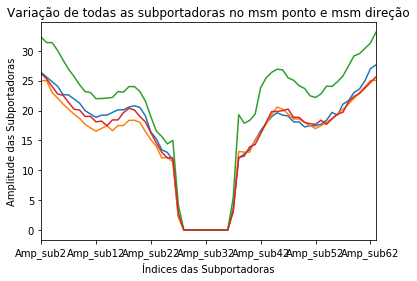

In [72]:
csisubcarrier[csisubcarrier.columns[6:129:2]].loc[320].plot()
csisubcarrier[csisubcarrier.columns[6:129:2]].loc[321].plot()
csisubcarrier[csisubcarrier.columns[6:129:2]].loc[322].plot()
csisubcarrier[csisubcarrier.columns[6:129:2]].loc[323].plot()
plt.title("Variação de todas as subportadoras no msm ponto e msm direção")
plt.xlabel("Índices das Subportadoras")
plt.ylabel("Amplitude das Subportadoras")